<a href="https://colab.research.google.com/github/mnshcodie/IIScEx_2021/blob/main/M3_AST_24_CycleGAN_for_Apple2Orange_dataset_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint

### Assignment 24: CycleGAN implemented on Apples and Oranges dataset

## Learning Objectives

   
  At the end of the experiment, you will be able to understand:
  * What Is the CycleGAN Architecture?
  * How to Implement the CycleGAN Generator & Discriminator Model
  * How to Implement Composite Models for Least Squares and Cycle Loss
  * How to Update Discriminator and Generator Models

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M3_AST_24_CycleGAN_for_Apple2Orange_dataset_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/apple2orange_train_and_test.zip")
    ipython.magic("sx unzip -qq apple2orange_train_and_test.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### Dataset Description

ImageNet Large Scale Visual Recognition Challenge 2012 classification dataset, consisting of 1.2 million training images, with 1,000 classes of objects. Only classes "apple" and "orange" were used for training.

# CycleGAN, Image-to-Image Translation


A CycleGAN is made of two discriminator and two generator networks



In this notebook, we're going to define and train a CycleGAN to read in an image from a set $X$ and transform it so that it looks as if it belongs in set $Y$. 

>The objective will be to train generators that learn to transform an image from domain $X$ into an image that looks like it came from domain $Y$ (and vice versa). 

($X$ ====> $Y$)

($Y$ ====> $X$)






### CycleGAN 

A CycleGAN is made of two types of networks: **discriminators**, and **generators**. In this example,
* the generators are responsible for generating convincing, fake images for both kinds of images 
* the discriminators are responsible for classifying images as real or fake (for both $X$ and $Y$ kinds of images). .

This notebook will detail the steps you should take to define and train such a CycleGAN.

1. You'll load in the image data using PyTorch's DataLoader class to efficiently read in images from a specified directory.

2. Then, you'll be tasked with defining the CycleGAN architecture according to provided specifications. You'll define the discriminator and the generator models.

3. You'll complete the training cycle by calculating the adversarial and cycle consistency losses for the generator and discriminator network and completing a number of training epochs. It's suggested that you enable GPU usage for training.

4. Finally, you'll evaluate your model by looking at the loss over time and looking at sample, generated images.

### Unpaired Training Data

These images do not come with labels, but CycleGANs give us a way to learn the mapping between one image domain and another using an **unsupervised** approach. A CycleGAN is designed for image-to-image translation and it learns from unpaired training data. This means that in order to train a generator to translate images from domain $X$ to domain $Y$, we do not have to have exact correspondences between individual images in those domains. For example, in [the paper that introduced CycleGANs](https://arxiv.org/abs/1703.10593), the authors are able to translate between images of horses and zebras, even though there are no images of a zebra in exactly the same position as a horse or with exactly the same background, etc. Thus, CycleGANs enable learning a mapping from one domain $X$ to another domain $Y$ without having to find perfectly-matched, training pairs!


In [ ]:
!nvidia-smi

#### Copying files to seperate train and test folders(Apples and Oranges seperately)

In [ ]:
import shutil
shutil.copytree("/content/apple2orange_dataset/Apples/Apples","/content/apple2orange/train/A")
shutil.copytree("/content/apple2orange_dataset/Oranges/Oranges","/content/apple2orange/train/B")
shutil.copytree("/content/apple2orange_dataset/test_Apples/Apples","/content/apple2orange/test/A")
shutil.copytree("/content/apple2orange_dataset/test_Oranges/Oranges","/content/apple2orange/test/B")

In [ ]:
shutil.rmtree("/content/apple2orange_dataset")

## Importing libraries

In [ ]:
import itertools,glob,os,random,cv2,time
import matplotlib.image as mpimg
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.utils.data
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from PIL import Image
from tqdm import tqdm

### Decay learning rate after certain number of epochs

In [ ]:
class DecayLR:
    def __init__(self, epochs, offset, decay_epochs):
        epoch_flag = epochs - decay_epochs
        assert (epoch_flag > 0), "Decay must start before the training session ends!"
        self.epochs = epochs
        self.offset = offset
        self.decay_epochs = decay_epochs

    def step(self, epoch):
        return 1.0 - max(0, epoch + self.offset - self.decay_epochs) / (
                self.epochs - self.decay_epochs)

In [ ]:
class ReplayBuffer:
    def __init__(self, max_size=50):
        assert (max_size > 0), "Empty buffer or trying to create a black hole. Be careful."
        self.max_size = max_size
        self.data = []

    def push_and_pop(self, data):
        to_return = []
        for element in data.data:
            element = torch.unsqueeze(element, 0)
            if len(self.data) < self.max_size:
                self.data.append(element)
                to_return.append(element)
            else:
                if random.uniform(0, 1) > 0.5:
                    i = random.randint(0, self.max_size - 1)
                    to_return.append(self.data[i].clone())
                    self.data[i] = element
                else:
                    to_return.append(element)
        return torch.cat(to_return)


# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find("BatchNorm") != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias)

---
## Define the Model

A CycleGAN is made of two discriminator and two generator networks.


Instance normalization normalizes across each channel in each training example instead of normalizing across input features in an training example. Unlike batch normalization, the instance normalization layer is applied at test time as well(due to non-dependency of mini-batch).

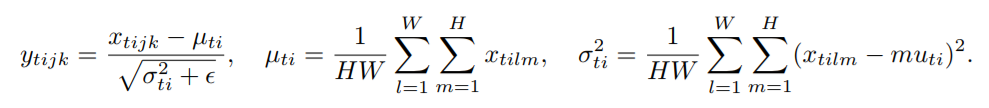

This image is taken from https://arxiv.org/pdf/1607.08022.pdf

Here, x∈ ℝ T ×C×W×H be an input tensor containing a batch of T images. Let xₜᵢⱼₖ denote its tijk-th element, where k and j span spatial dimensions(Height and Width of the image), i is the feature channel (color channel if the input is an RGB image), and t is the index of the image in the batch.

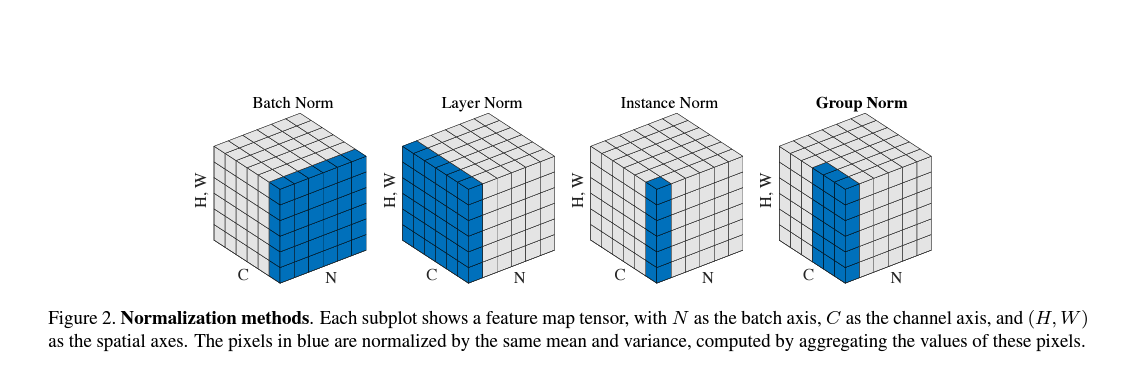

###Architecture diagram of Cycle GAN
(No.of conv blocksand residual blocks may vay)
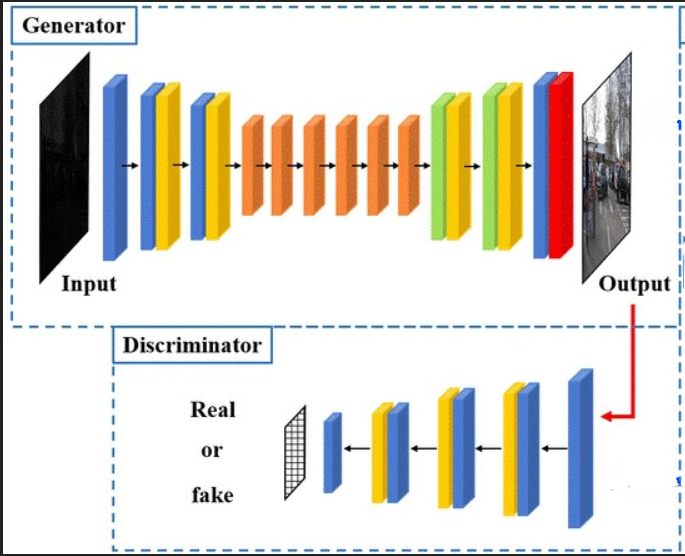

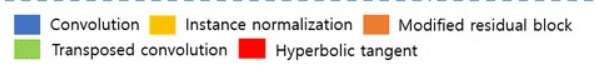

## Residual Blocks and Residual Function
While defining Generator architecture we will be using something called Resnet block and residual function in our architecture. The idea behind using Resnet Block and residual function is the following:
### Residual Block
Residual Block connects encoder and decoder. The motivation behind this architecture is as follows: 

Deep neural networks can be very difficult to train, as they are more likely to have exploding or vanishing gradients and, therefore, have trouble reaching convergence; batch normalization helps with this a bit.
One solution to this problem is to use Resnet blocks that allow us to learn so-called residual functions as they are applied to layer inputs.
Residual Function

When we create a deep learning model, the model (several layers with activations applied) is responsible for learning a mapping, M, from an input x to an output y.

#### M(x) = y

Instead of learning a direct mapping from x to y, we can instead define a residual function.

#### F(x) = M(x)-x

This looks at the difference between a mapping applied to x and the original input, x.Here in this current experiment F(x) is, typically, 

`reflection pad + two conv layers + Instance norm layer and a ReLU in between`

 These convolutional layers should have the same number of inputs as outputs. This mapping can then be written as the following; a function of the residual function and the input x.

#### M(x) = F(x) + x

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()

        self.res = nn.Sequential(nn.ReflectionPad2d(1),
                                 nn.Conv2d(in_channels, in_channels, 3),
                                 nn.InstanceNorm2d(in_channels),
                                 nn.ReLU(inplace=True),
                                 nn.ReflectionPad2d(1),
                                 nn.Conv2d(in_channels, in_channels, 3),
                                 nn.InstanceNorm2d(in_channels))

    def forward(self, x):
        return x + self.res(x)

## Generators

The generators, `netG_AtoB` and `netG_BtoA` are made of an **encoder**, a conv net that is responsible for turning an image into a smaller feature representation, and a **decoder**, a *transpose_conv* net that is responsible for turning that representation into an transformed image. These generators, one from AtoB and one from BtoA, have the following architecture:


This network sees a 128x128x3 image, compresses it into a feature representation as it goes through three convolutional layers and reaches a series of residual blocks. It goes through a few (typically 6 or more) of these residual blocks, then it goes through three transpose convolutional layers (sometimes called *de-conv* layers) which upsample the output of the resnet blocks and create a new image!

Note that most of the convolutional and transpose-convolutional layers have `InstanceNorm` and `LeakyReLu` functions applied to their outputs with the exception of the final transpose convolutional layer, which has a `tanh` activation function applied to the output. Also, the residual blocks are made of convolutional and batch normalization layers, which we'll go over in more detail, next.

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Initial convolution block
            nn.ReflectionPad2d(3),
            nn.Conv2d(3, 64, 7),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),

            # Downsampling
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.ReLU(inplace=True),

            # Residual blocks
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),

            # Upsampling
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),

            # Output layer
            nn.ReflectionPad2d(3),
            nn.Conv2d(64, 3, 7),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

## Discriminators

The discriminators, $D_X$ and $D_Y$, in this CycleGAN are convolutional neural networks that see an image and attempt to classify it as real or fake. In this case, real is indicated by an output close to 1 and fake as close to 0. The discriminators have the following architecture:


This network sees a 128x128x3 image, and passes it through 5 convolutional layers that downsample the image by a factor of 2. The first four convolutional layers have a `InstanceNorm` and `Leaky_ReLu` activation function applied to their output, and the last acts as a classification layer that outputs one value.


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, padding=1),
            nn.InstanceNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, padding=1),
        )

    def forward(self, x):
        x = self.main(x)
        x = F.avg_pool2d(x, x.size()[2:])
        x = torch.flatten(x, 1)
        return x

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, root, transform=None, unaligned=False, mode="train"):
        self.transform = transform
        self.unaligned = unaligned

        self.files_A = sorted(glob.glob(os.path.join(root, f"{mode}/A") + "/*.*"))
        self.files_B = sorted(glob.glob(os.path.join(root, f"{mode}/B") + "/*.*"))

    def __getitem__(self, index):
        item_A = self.transform(Image.open(self.files_A[index % len(self.files_A)]))

        if self.unaligned:
            item_B = self.transform(Image.open(self.files_B[random.randint(0, len(self.files_B) - 1)]))
        else:
            item_B = self.transform(Image.open(self.files_B[index % len(self.files_B)]))

        return {"A": item_A, "B": item_B}

    def __len__(self):
        return max(len(self.files_A), len(self.files_B))

#### Creating Generators and Discriminators

Here we are creating generator and discriminator architetures for A2B and B2A generators and discriminators for both generators

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# create model
netG_A2B = Generator().to(device)
netG_B2A = Generator().to(device)
netD_A = Discriminator().to(device)
netD_B = Discriminator().to(device)

#Initializing weights
netG_A2B.apply(weights_init)
netG_B2A.apply(weights_init)
netD_A.apply(weights_init)
netD_B.apply(weights_init)

## Loss functions
Each generator model is optimized via the combination of four outputs with four loss functions:


### Adversarial loss (L2 or mean squared error).
The generator models are trained via their related discriminator models. Specifically, they are updated to minimize the loss predicted by the discriminator for generated images marked as “real“, called adversarial loss. As such, they are encouraged to generate images that better fit into the target domain.

`real_image_B(input) ====> netG_B2A() ====> gen_image_A(output)`

`gen_image_A(output of netG_B2A() ) ====> netD_A ====> output_label_of_D_A`

`loss_GAN_B2A = adversarial_loss(output_label_of_D_A, real_label)`

### Identity loss (L1 or mean absolute error).

#### Identity Mapping : 
A generator model(say netG_A2B) is expected to output an image without translation when provided an example from the target domain B(instead of the source domain A) results in a better matching of the color profile of the input image.Loss calculated here is called identity loss.

`Domain-B(original) -> netG_A2B -> Domain-B(generated)`
 
### Cycle loss (L1 or mean absolute error).

Passing an image through both generators is called a cycle

`Domain-A(original) -> netG_A2B -> netG_B2A -> Domain-A(reconstructed)`

Forward cycle loss involves connecting the output of the generator(netG_A2B) to the other generator(netG_B2A), which will reconstruct the source image(here A).

`Domain-B(original) -> netG_B2A -> netG_A2B -> Domain-B(reconsructed)`

Backward cycle loss involves the image from the target domain(here B) passed through the other generator(netG_B2A) whose output is connected to our main generator(here netG_A2B) as input and outputs a reconstructed version of that image from the target domain(here B).

Each pair of generator models are trained to better reproduce the original source image, referred to as cycle consistency.


<img src='https://github.com/EliShayGH/deep-learning-v2-pytorch/blob/master/cycle-gan/notebook_images/CycleGAN_loss.png?raw=1' width=100% height=25% />

**Image from [original paper](https://arxiv.org/abs/1703.10593) by Jun-Yan Zhu et. al.**





In [ ]:
cycle_loss = torch.nn.L1Loss() # L1 or mean absolute error
identity_loss = torch.nn.L1Loss() # L1 or mean absolute error
adversarial_loss = torch.nn.MSELoss() # L2 or mean squared error

In [ ]:
epochs = 50
decay_epochs = 25
lr = 0.0002
print_freq = 5
outf = "./outputs"

In [ ]:
!mkdir "./outputs"

### Adam Optimizer
Adam optimizer for generator and discriminator models

In [ ]:
optimizer_G = torch.optim.Adam(itertools.chain(netG_A2B.parameters(), netG_B2A.parameters()),
                               lr=lr, betas=(0.5, 0.999))
optimizer_D_A = torch.optim.Adam(netD_A.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D_B = torch.optim.Adam(netD_B.parameters(), lr=lr, betas=(0.5, 0.999))

### Learning Rate Scheduler
Learning rate schedules seek to adjust the learning rate during training by reducing the learning rate according to a pre-defined schedule in our present experiment we are using `DecayLR` class.

In [ ]:
lr_lambda = DecayLR(epochs, 0,decay_epochs).step #decay learning rate
lr_scheduler_G = torch.optim.lr_scheduler.LambdaLR(optimizer_G, lr_lambda=lr_lambda)
lr_scheduler_D_A = torch.optim.lr_scheduler.LambdaLR(optimizer_D_A, lr_lambda=lr_lambda)
lr_scheduler_D_B = torch.optim.lr_scheduler.LambdaLR(optimizer_D_B, lr_lambda=lr_lambda)

In [ ]:
# g_losses = []
# d_losses = []

# identity_losses = []
# gan_losses = []
# cycle_losses = []

fake_A_buffer = ReplayBuffer()
fake_B_buffer = ReplayBuffer()

### Creating training image datasets

Here we are creating training image dataset using custom `ImageDataset` class and loaidng the images in batches using `Dataloader` class

In [ ]:
# Dataset
dataset = ImageDataset(root="/content/apple2orange/",
                       transform=transforms.Compose([
                           transforms.Resize(128, Image.BICUBIC),
                           transforms.RandomHorizontalFlip(),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
                       unaligned=True)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=8,pin_memory=True)

### Creating testing image datasets

Here we are creating testing image dataset using custom `ImageDataset` class and loaidng the images in batches using `Dataloader` class

In [ ]:
dataset = ImageDataset(root="/content/apple2orange/",
                       transform=transforms.Compose([
                           transforms.Resize(128, Image.BICUBIC),
                           transforms.RandomHorizontalFlip(),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
                       unaligned=True,mode = "test")

test_loader = torch.utils.data.DataLoader(dataset, batch_size=8,pin_memory=True)

Creating directories to save generated and recovered images

In [ ]:
!mkdir -p "/content/outputs/apple2orange/A"
!mkdir -p "/content/outputs/apple2orange/B"
!mkdir -p "/content/weights/apple2orange"
dataset = "apple2orange"

### Helper function to visualise the generated images and recovered images

In [ ]:
# helper visualization code
def view_samples(root,epoch):
  real_samples_A_path = os.path.join(root,f"A/real_samples_epoch_{epoch}.png")
  real_samples_B_path = os.path.join(root,f"B/real_samples_epoch_{epoch}.png")

  fake_samples_A_path = os.path.join(root,f"A/fake_samples_epoch_{epoch}.png")
  fake_samples_B_path = os.path.join(root,f"B/fake_samples_epoch_{epoch}.png")
  
  recovered_samples_A_path = os.path.join(root,f"A/recovered_samples_epoch_{epoch}.png")
  recovered_samples_B_path = os.path.join(root,f"B/recovered_samples_epoch_{epoch}.png")

  A = mpimg.imread(real_samples_A_path)
  A2B = mpimg.imread(fake_samples_A_path)
  B2A = mpimg.imread(recovered_samples_A_path)

  fig, (ax1, ax2,ax3) = plt.subplots(figsize=(10,10), nrows=3, ncols=1, sharey=True, sharex=True)
  text = "Apples"
  text.center(20,"-")
  ax1.imshow(A)
  ax1.set_title(f'Original Samples - {text}')
  ax2.imshow(A2B)
  ax2.set_title(f'Fake/Generated Samples - {text}')
  ax3.imshow(B2A)
  ax3.set_title(f'Recovered Samples - {text}')
  plt.show()
  
  fig, (ax1, ax2,ax3) = plt.subplots(figsize=(10,10), nrows=3, ncols=1, sharey=True, sharex=True)
  B = mpimg.imread(real_samples_B_path)
  B2A = mpimg.imread(fake_samples_B_path)
  A2B = mpimg.imread(recovered_samples_B_path)

  text = "Oranges"
  text.center(20,"-")
  ax1.imshow(B)
  ax1.set_title(f'Original Samples - {text}')
  ax2.imshow(B2A)
  ax2.set_title(f'Fake/Generated Samples - {text}')
  ax3.imshow(A2B)
  ax3.set_title(f'Recovered Samples - {text}')
  plt.show()

### Training the Cycle GAN

Here we are training our generator and discriminator networks on apples and oranges dataset and optimizing the networks for low losses(cycle consistency losses and adversarial losses)

In [ ]:
train_losses = []
test_losses = []
for epoch in range(1, epochs+1):
    progress_bar = tqdm(enumerate(dataloader), total=len(dataloader))
    losses_train_D = []
    losses_train_G = []
    losses_train_cycle = []
    losses_test_D = []
    losses_test_G = []
    losses_test_cycle = []


    for i, data in progress_bar:
        # get batch size data
        netG_A2B.train()
        netG_B2A.train()
        netD_A.train()
        netD_B.train()
        # get batch size data
        real_image_A = data["A"].to(device)
        real_image_B = data["B"].to(device)
        batch_size = real_image_A.size(0)

        # real data label is 1, fake data label is 0.
        real_label = torch.full((batch_size, 1), 1, device=device, dtype=torch.float32)
        fake_label = torch.full((batch_size, 1), 0, device=device, dtype=torch.float32)

        ##############################################
        # (1) Update G network: Generators A2B and B2A
        ##############################################

        # Set G_A and G_B's gradients to zero
        optimizer_G.zero_grad()

        # ----------Identity loss----------
        # G_B2A(A) should equal A if real A is fed
        identity_image_A = netG_B2A(real_image_A)
        loss_identity_A = identity_loss(identity_image_A, real_image_A) * 5.0
        
        # G_A2B(B) should equal B if real B is fed
        identity_image_B = netG_A2B(real_image_B)
        loss_identity_B = identity_loss(identity_image_B, real_image_B) * 5.0

        #------------GAN loss------------
        # GAN loss D_A(G_A(A))
        fake_image_A = netG_B2A(real_image_B)
        fake_output_A = netD_A(fake_image_A)
        loss_GAN_B2A = adversarial_loss(fake_output_A, real_label)
        # GAN loss D_B(G_B(B))
        fake_image_B = netG_A2B(real_image_A)
        fake_output_B = netD_B(fake_image_B)
        loss_GAN_A2B = adversarial_loss(fake_output_B, real_label)

        # ------------Cycle loss------------
        recovered_image_A = netG_B2A(fake_image_B)
        loss_cycle_ABA = cycle_loss(recovered_image_A, real_image_A) * 10.0

        recovered_image_B = netG_A2B(fake_image_A)
        loss_cycle_BAB = cycle_loss(recovered_image_B, real_image_B) * 10.0

        # Combined loss and calculate gradients
        errG = loss_identity_A + loss_identity_B + loss_GAN_A2B + loss_GAN_B2A + loss_cycle_ABA + loss_cycle_BAB

        # Calculate gradients for G_A and G_B
        errG.backward()
        # Update G_A and G_B's weights
        optimizer_G.step()

        ##############################################
        # (2) Update D network: Discriminator A
        ##############################################

        # Set D_A gradients to zero
        optimizer_D_A.zero_grad()

        # Real A image loss
        real_output_A = netD_A(real_image_A)
        errD_real_A = adversarial_loss(real_output_A, real_label)

        # Fake A image loss
        fake_image_A = fake_A_buffer.push_and_pop(fake_image_A)
        fake_output_A = netD_A(fake_image_A.detach())
        errD_fake_A = adversarial_loss(fake_output_A, fake_label)

        # Combined loss and calculate gradients
        errD_A = (errD_real_A + errD_fake_A) / 2

        # Calculate gradients for D_A
        errD_A.backward()
        # Update D_A weights
        optimizer_D_A.step()

        ##############################################
        # (3) Update D network: Discriminator B
        ##############################################

        # Set D_B gradients to zero
        optimizer_D_B.zero_grad()

        # Real B image loss
        real_output_B = netD_B(real_image_B)
        errD_real_B = adversarial_loss(real_output_B, real_label)

        # Fake B image loss
        fake_image_B = fake_B_buffer.push_and_pop(fake_image_B)
        fake_output_B = netD_B(fake_image_B.detach())
        errD_fake_B = adversarial_loss(fake_output_B, fake_label)

        # Combined loss and calculate gradients
        errD_B = (errD_real_B + errD_fake_B) / 2

        # Calculate gradients for D_B
        errD_B.backward()
        # Update D_B weights
        optimizer_D_B.step()

        Loss_D = (errD_A + errD_B).item()
        Loss_G = errG.item()
        Loss_G_cycle = (loss_cycle_ABA + loss_cycle_BAB).item()
        losses_train_D.append(Loss_D)
        losses_train_G.append(Loss_G)
        losses_train_cycle.append(Loss_G_cycle)

        progress_bar.set_description(
            f"[{epoch}/{epochs }][{i}/{len(dataloader) - 1}] "
            f"Loss_D: {(errD_A + errD_B).item():.4f} "
            f"Loss_G: {errG.item():.4f} "
            f"Loss_G_identity: {(loss_identity_A + loss_identity_B).item():.4f} "
            f"loss_G_GAN: {(loss_GAN_A2B + loss_GAN_B2A).item():.4f} "
            f"loss_G_cycle: {(loss_cycle_ABA + loss_cycle_BAB).item():.4f}")

        # if i % print_freq == 0:
        #     vutils.save_image(real_image_A,f"{outf}/{dataset}/A/real_samples_epoch_{epoch}.png",normalize=True)
        #     vutils.save_image(real_image_B,f"{outf}/{dataset}/B/real_samples_epoch_{epoch}.png",normalize=True)


        #     fake_image_A = 0.5 * (netG_B2A(real_image_B).data + 1.0)
        #     fake_image_B = 0.5 * (netG_A2B(real_image_A).data + 1.0)
        #     # for j in range(fake_image_A.size(0)):
        #     #   torchvision.utils.save_image(fake_image_A[j, :, :, :],f"{outf}/{dataset}/A/fake_samples_epoch_{epoch}/fake_image_A_{j}.png",normalize=True)
        #     # for k in range(fake_image_B.size(0)):
        #     #   torchvision.utils.save_image(fake_image_B[k, :, :, :],f"{outf}/{dataset}/A/fake_samples_epoch_{epoch}/fake_image_B_{j}.png",normalize=True)

        #     vutils.save_image(fake_image_A.detach(),f"{outf}/{dataset}/A/fake_samples_epoch_{epoch}.png",normalize=True)
        #     vutils.save_image(fake_image_B.detach(),f"{outf}/{dataset}/B/fake_samples_epoch_{epoch}.png",normalize=True)
     # do check pointing
    train_losses.append((np.array(losses_train_D).mean(),np.array(losses_train_G).mean(),np.array(losses_train_cycle).mean()))

    torch.save(netG_A2B.state_dict(), f"weights/{dataset}/netG_A2B_epoch_{epoch}.pth")
    torch.save(netG_B2A.state_dict(), f"weights/{dataset}/netG_B2A_epoch_{epoch}.pth")
    torch.save(netD_A.state_dict(), f"weights/{dataset}/netD_A_epoch_{epoch}.pth")
    torch.save(netD_B.state_dict(), f"weights/{dataset}/netD_B_epoch_{epoch}.pth")

    progress_bar = tqdm(enumerate(test_loader), total = len(test_loader))
    for i, data in progress_bar:
        # get batch size data
        netG_A2B.eval()
        netG_B2A.eval()
        netD_A.eval()
        netD_B.eval()
        # get batch size data
        real_image_A = data["A"].to(device)
        real_image_B = data["B"].to(device)
        batch_size = real_image_A.size(0)

        # real data label is 1, fake data label is 0.
        real_label = torch.full((batch_size, 1), 1, device=device, dtype=torch.float32)
        fake_label = torch.full((batch_size, 1), 0, device=device, dtype=torch.float32)

        ##############################################
        # (1) Update G network: Generators A2B and B2A
        ##############################################


        # Identity loss
        # G_B2A(A) should equal A if real A is fed
        identity_image_A = netG_B2A(real_image_A)
        loss_identity_A = identity_loss(identity_image_A, real_image_A) * 5.0
        # G_A2B(B) should equal B if real B is fed
        identity_image_B = netG_A2B(real_image_B)
        loss_identity_B = identity_loss(identity_image_B, real_image_B) * 5.0

        # GAN loss
        # GAN loss D_A(G_A(A))
        fake_image_A = netG_B2A(real_image_B)
        fake_output_A = netD_A(fake_image_A)
        loss_GAN_B2A = adversarial_loss(fake_output_A, real_label)
        # GAN loss D_B(G_B(B))
        fake_image_B = netG_A2B(real_image_A)
        fake_output_B = netD_B(fake_image_B)
        loss_GAN_A2B = adversarial_loss(fake_output_B, real_label)

        # Cycle loss
        recovered_image_A = netG_B2A(fake_image_B)
        loss_cycle_ABA = cycle_loss(recovered_image_A, real_image_A) * 10.0

        recovered_image_B = netG_A2B(fake_image_A)
        loss_cycle_BAB = cycle_loss(recovered_image_B, real_image_B) * 10.0

        # Combined loss and calculate gradients
        errG = loss_identity_A + loss_identity_B + loss_GAN_A2B + loss_GAN_B2A + loss_cycle_ABA + loss_cycle_BAB

       

        ##############################################
        # (2) Update D network: Discriminator A
        ##############################################

       
        # Real A image loss
        real_output_A = netD_A(real_image_A)
        errD_real_A = adversarial_loss(real_output_A, real_label)

        # Fake A image loss
        fake_image_A = fake_A_buffer.push_and_pop(fake_image_A)
        fake_output_A = netD_A(fake_image_A.detach())
        errD_fake_A = adversarial_loss(fake_output_A, fake_label)

        # Combined loss and calculate gradients
        errD_A = (errD_real_A + errD_fake_A) / 2


        ##############################################
        # (3) Update D network: Discriminator B
        ##############################################

    
        # Real B image loss
        real_output_B = netD_B(real_image_B)
        errD_real_B = adversarial_loss(real_output_B, real_label)

        # Fake B image loss
        fake_image_B = fake_B_buffer.push_and_pop(fake_image_B)
        fake_output_B = netD_B(fake_image_B.detach())
        errD_fake_B = adversarial_loss(fake_output_B, fake_label)

        # Combined loss and calculate gradients
        errD_B = (errD_real_B + errD_fake_B) / 2

        
        Loss_D = (errD_A + errD_B).item()
        Loss_G = errG.item()
        Loss_G_cycle = (loss_cycle_ABA + loss_cycle_BAB).item()
        losses_test_D.append(Loss_D)
        losses_test_G.append(Loss_G)
        losses_test_cycle.append(Loss_G_cycle)


        progress_bar.set_description(
            f"[{epoch}/{epochs }][{i}/{len(test_loader) - 1}] "
            f"Test_Loss_D: {(errD_A + errD_B).item():.4f} "
            f"Test_Loss_G: {errG.item():.4f} "
            f"Test_Loss_G_identity: {(loss_identity_A + loss_identity_B).item():.4f} "
            f"Test_loss_G_GAN: {(loss_GAN_A2B + loss_GAN_B2A).item():.4f} "
            f"Test_loss_G_cycle: {(loss_cycle_ABA + loss_cycle_BAB).item():.4f}")
        
    if epoch % 5 == 0:
      vutils.save_image(real_image_A,f"{outf}/{dataset}/A/real_samples_epoch_{epoch}.png",normalize=True)
      vutils.save_image(real_image_B,f"{outf}/{dataset}/B/real_samples_epoch_{epoch}.png",normalize=True)


      fake_image_A = 0.5 * (netG_B2A(real_image_B).data + 1.0)
      fake_image_B = 0.5 * (netG_A2B(real_image_A).data + 1.0)
      vutils.save_image(fake_image_B.detach(),f"{outf}/{dataset}/A/fake_samples_epoch_{epoch}.png",normalize=True)
      vutils.save_image(fake_image_A.detach(),f"{outf}/{dataset}/B/fake_samples_epoch_{epoch}.png",normalize=True)

      vutils.save_image(recovered_image_A.detach(),f"{outf}/{dataset}/A/recovered_samples_epoch_{epoch}.png",normalize=True)
      vutils.save_image(recovered_image_B.detach(),f"{outf}/{dataset}/B/recovered_samples_epoch_{epoch}.png",normalize=True)
    root = f"{outf}/{dataset}"
    if epoch % 25 == 0:
      view_samples(root,epoch)
      # for j in range(fake_image_A.size(0)):
      #   torchvision.utils.save_image(fake_image_A[j, :, :, :],f"{outf}/{dataset}/A/fake_samples_epoch_{epoch}/fake_image_A_{j}.png",normalize=True)
      # for k in range(fake_image_B.size(0)):
      #   torchvision.utils.save_image(fake_image_B[k, :, :, :],f"{outf}/{dataset}/A/fake_samples_epoch_{epoch}/fake_image_B_{j}.png",normalize=True)

          

    test_losses.append((np.array(losses_test_D).mean(),np.array(losses_test_G).mean(),np.array(losses_test_cycle).mean()))


    # Update learning rates
    lr_scheduler_G.step()
    lr_scheduler_D_A.step()
    lr_scheduler_D_B.step()

In [ ]:
#converting train _losses to numpy arrays

train_losses = np.array(train_losses)
test_losses = np.array(test_losses)

#### Plotting training losses

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(train_losses.T[0], label='Discriminator', alpha=0.9)
plt.plot(train_losses.T[1], label='Generator', alpha=0.9)
plt.plot(train_losses.T[2], label='Cyclic Loss', alpha=0.9)
plt.title("Training Losses")
plt.legend()

#### Plotting testing losses

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

plt.plot(test_losses.T[0], label='Discriminator', alpha=0.9)
plt.plot(test_losses.T[1], label='Generator', alpha=0.9)
plt.plot(test_losses.T[2], label='Cyclic Loss', alpha=0.9)
plt.title("Training Losses")
plt.legend()

#### Saving the models

Here we are saving the trained generator and discriminator models

In [ ]:
# save last check pointing
torch.save(netG_A2B.state_dict(), f"weights/{dataset}/netG_A2B.pth")
torch.save(netG_B2A.state_dict(), f"weights/{dataset}/netG_B2A.pth")
torch.save(netD_A.state_dict(), f"weights/{dataset}/netD_A.pth")
torch.save(netD_B.state_dict(), f"weights/{dataset}/netD_B.pth")

### Inferencing saved models

Here we are evaulating the trained models on test set to get generated and recovered images for both A2B and B2A networks

In [ ]:
dataset = ImageDataset(root="/content/apple2orange/",
                       transform=transforms.Compose([
                           transforms.Resize(224, Image.BICUBIC),
                           transforms.RandomHorizontalFlip(),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
                       unaligned=True,mode = "test")

test_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, pin_memory=True)

In [ ]:
!mkdir "test_outputs"

In [ ]:
outf = "./test_outputs"

In [ ]:
try:
    os.makedirs(os.path.join(outf,"A"))
    os.makedirs(os.path.join(outf,"B"))
except OSError:
    pass

In [ ]:
# create model
netG_A2B = Generator().to(device)
netG_B2A = Generator().to(device)

# Load state dicts
netG_A2B.load_state_dict(torch.load(os.path.join("/content/weights/apple2orange", "netG_A2B.pth")))
netG_B2A.load_state_dict(torch.load(os.path.join("/content/weights/apple2orange", "netG_B2A.pth")))

# Set model mode
netG_A2B.eval()
netG_B2A.eval()

progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))

for i, data in progress_bar:
    # get batch size data
    real_images_A = data["A"].to(device)
    real_images_B = data["B"].to(device)

    # Generate output
    fake_image_A = 0.5 * (netG_B2A(real_images_B).data + 1.0)
    fake_image_B = 0.5 * (netG_A2B(real_images_A).data + 1.0)

    cycle_gen_A = 0.5 * (netG_B2A(fake_image_B).data + 1.0)
    cycle_gen_B = 0.5 * (netG_A2B(fake_image_A).data + 1.0)

    # Save image files
    vutils.save_image(real_images_A.detach(), f"{outf}/A/real_A+{i + 1:04d}.png", normalize=True)
    vutils.save_image(real_images_B.detach(), f"{outf}/B/real_B+{i + 1:04d}.png", normalize=True)
    vutils.save_image(fake_image_A.detach(), f"{outf}/B/gen_B+{i + 1:04d}.png", normalize=True)
    vutils.save_image(fake_image_B.detach(), f"{outf}/A/gen_A+{i + 1:04d}.png", normalize=True)
    vutils.save_image(cycle_gen_A.detach(), f"{outf}/A/cycle_gen_A+{i + 1:04d}.png", normalize=True)
    vutils.save_image(cycle_gen_B.detach(), f"{outf}/B/cycle_ge_B+{i + 1:04d}.png", normalize=True)
    


    progress_bar.set_description(f"Process images {i + 1} of {len(test_loader)}")

### Please answer the questions below to complete the experiment:




#### Consider the following statements about CycleGANs and answer Q1.

A. CycleGAN is a procedure for unpaired Image-to-Image translation using cycle-consistent adversarial networks.

B. CycleGAN uses single discriminator for evaluating both generators G_A2B and G_B2A.

C. CycleGAN is a procedure for paired Image-to-Image translation using cycle-consistent adversarial networks.

D. Cycle consistency loss is calculated between input to first generator G_A2B and output of second generator G_B2A.

In [ ]:
#@title Q1. Which of the above statements is/are True regrading CycleGANs ?
Answer1 = "" #@param ["", "Only A", "Only B", "Only D", "A and D ", "B and C"]


#### Consider the following statements regarding Generator in  GANs and answer Q2.
The standard GAN loss function, also known as the min-max loss, was  described as.

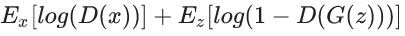

A. Aim of generator is to minimize the probability of images being predicted as fake

B. Aim of the generator is to minimize the probability of images being predicted as real.

C. Minimize log(1-D(G(z)))

D. Maximizes the log of the discriminator probabilities  log(D(G(z)))

In [ ]:
#@title Q2. Which of the above statements is/are True regrading generator network in GANs?
Answer2 = "" #@param ["","Only B and C","Only A and D","A, C and D","A, B and C"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first..")
except NameError:
  print ("Please complete the setup first.")